# Credit Card Fraud Detection (Task 2) CodSoft ML Internship

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [53]:
data.isnull().sum().sum()

0

In [54]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

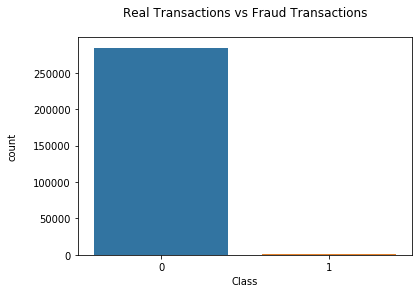

In [55]:
sns.countplot(data=data, x='Class')
plt.xlabel('Class')
plt.ylabel('count\n')
plt.title('Real Transactions vs Fraud Transactions\n')
plt.show()

In [56]:
real_transaction = data[data["Class"] == 0]
fraud_transaction = data[data["Class"] == 1]
print("Total rows of real transaction:", real_transaction.shape[0])
print("Total rows of fraud transaction:", fraud_transaction.shape[0])


Total rows of real transaction: 284315
Total rows of fraud transaction: 492


In [57]:
#handling imbalance rows
real_transaction_Sample = real_transaction.sample(n=492)
real_transaction_Sample.shape


(492, 31)

In [58]:
new_data = pd.concat([real_transaction_Sample, fraud_transaction], axis=0)

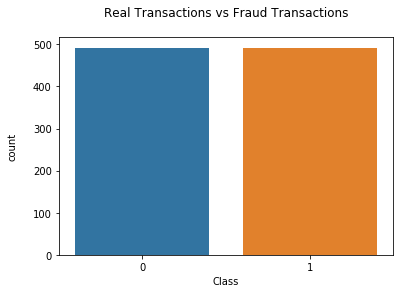

In [59]:
sns.countplot(data=new_data, x='Class')
plt.xlabel('Class')
plt.ylabel('count\n')
plt.title('Real Transactions vs Fraud Transactions\n')
plt.show()

In [60]:
X = new_data.drop(columns='Class', axis=1)
Y = new_data['Class']

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.22, stratify=Y, random_state=42)
print("Toatal Rows:", X.shape[0])
print("Toatal Rows for training:", X_train.shape[0])
print("Toatal Rows for testing:", X_test.shape[0])

Toatal Rows: 984
Toatal Rows for training: 767
Toatal Rows for testing: 217


# Model Training

In [62]:
lg_model = LogisticRegression(max_iter=200)
lg_model.fit(X_train, Y_train)
# accuracy on test data
Y_pred = lg_model.predict(X_test)
accuracy_score = accuracy_score(Y_pred, Y_test)
print('Logistic Regression Accuracy score: {}%' .format(accuracy_score * 100))


Logistic Regression Accuracy score: 94.93087557603687%


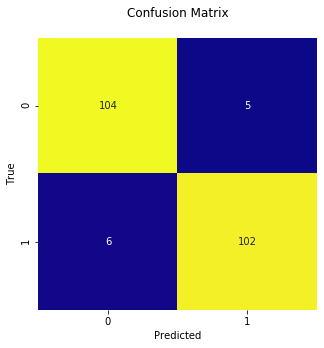

In [63]:
cm = confusion_matrix(Y_test,Y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d',cmap="plasma", cbar=False)
plt.xlabel("Predicted")
plt.ylabel('True')
plt.title("Confusion Matrix\n")
plt.show()